In [63]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

### Function to be approximated definitions

In [64]:
def root_3(x):
    return x**(1/3)

In [65]:
def sin(x):
    return np.sin(x)

In [66]:
def third_fun(x):
    return 4*x*((1-x)**3)

In [67]:
x_1 = np.linspace(0,8,100)
x_2 = np.linspace(0,np.pi,100)
x_3 = np.linspace(0,1,100)

### Plots of the approximated functions

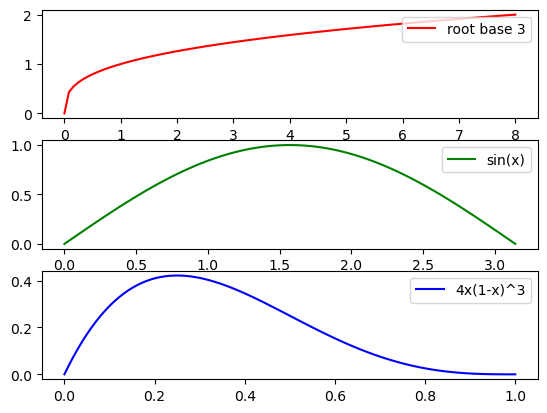

In [68]:
#plotting the relevant functions

fig, ax = plt.subplots(3,1)
ax[0].plot(x_1,root_3(x_1), label="root base 3", color="r")
ax[1].plot(x_2,sin(x_2), label = "sin(x)", color="g")
ax[2].plot(x_3,third_fun(x_3), label = "4x(1-x)^3", color="b")

ax[0].legend(loc='upper right')
ax[1].legend()
ax[2].legend()

### Definitions of functions used for simulation

In [69]:
#n-number of features, func-function,x1-start of the integral range, x2-end of the integral range, M-supremum of the function
def monte_carlo_approximator(n,func,x2,M,x1=0):
    rng = np.random.Generator(np.random.MT19937())
    
    points = rng.random((n,2))
    points[:,0] = x1 + points[:,0]*(x2-x1)
    points[:,1] = points[:,1]*M
    y = func(points[:,0])
    
    C = np.sum(y>points[:,1])
    approx = C/n*(x2-x1)*M
    return approx

In [70]:
def k_sim(k,n,func,x2,M,x1=0):
    attempts = []
    for i in range(k):
        attempts.append(monte_carlo_approximator(n,func,x2,M,x1))
    return np.array(attempts)

In [71]:
def make_plot(k,max_n,min_n,n_int,func,x2,M,x1=0,inc_avg=False,true_val=None):
    size = 10/k
    n=min_n
    fig, ax = plt.subplots()
    while n<=max_n:
        n_array = np.full(k,n)
        simulations = k_sim(k,n,func,x2,M,x1)
        ax.scatter(n_array,simulations,color='b',s=size, label="Monte Carlo" if n == min_n else "")
        if inc_avg:
            ax.scatter([n],np.mean(simulations),color='r',s=10, label="Average" if n==min_n else "")
        n+=n_int
    if true_val is not None:
        ax.plot([0,max_n],[true_val,true_val], color='g', label="True Value")
    return fig,ax

In [72]:
def save_plots(functions,kvals,max_n,min_n,n_int,x2s,Ms,true_vals):
    counter = 0
    for function in functions:
        a, _ = integrate.quad(function,0,x2s[counter])
        for kval in kvals:
            fig, ax = make_plot(k=kval,max_n=max_n,min_n=min_n,n_int=n_int,func=function,x2=x2s[counter],M=Ms[counter],true_val=true_vals[counter],inc_avg=True)
            ax.set_title(function.__name__)
            ax.set_xlabel("n\nk={}".format(kval))
            ax.legend(loc='upper right')
            fig.savefig('C:\\Users\JS\PycharmProjects\MpisMonteCarlo\plots\plot_func_{}_k_{}.png'.format(function.__name__, kval), dpi=100, format='png')
        counter += 1

### Example use, generating plots

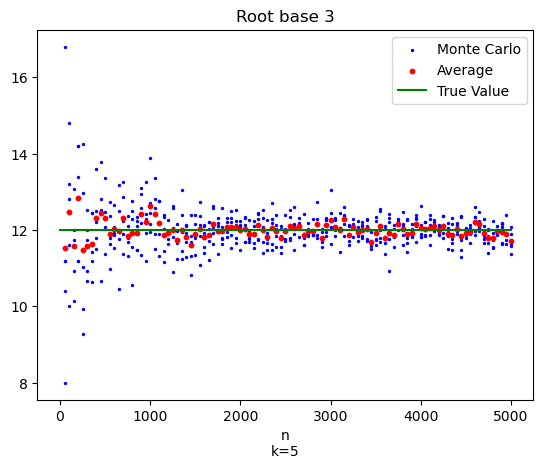

In [73]:
a, _ = integrate.quad(root_3,0,8)
fig,ax = make_plot(k=5,max_n=5000,min_n=50,n_int=50,func=root_3,x2=8,M=5,x1=0,inc_avg=True,true_val=a)
ax.set_title('Root base 3')
ax.set_xlabel("n\nk={}".format(5))
ax.legend(loc='upper right')

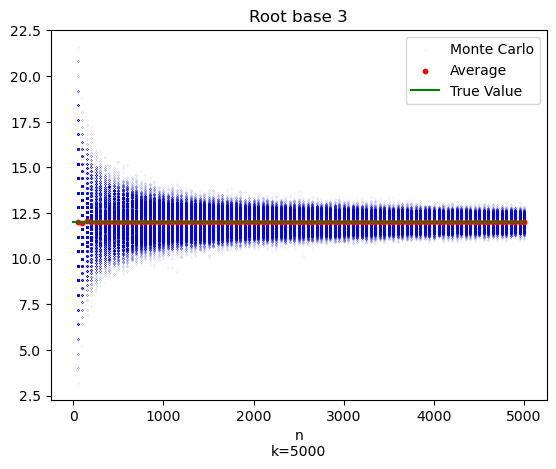

In [74]:
a, _ = integrate.quad(root_3,0,8)
fig,ax = make_plot(k=5000,max_n=5000,min_n=50,n_int=50,func=root_3,x2=8,M=5,x1=0,inc_avg=True,true_val=a)
ax.set_title('Root base 3')
ax.set_xlabel('n\nk=5000')
ax.legend(loc='upper right')

### pi Approximation

#### Definitions and plot of quarter unit circle 

In [75]:
def quarter_unit_circle(x):
    return (1-x**2)**0.5

In [76]:
x_4 = np.linspace(0,1,100)

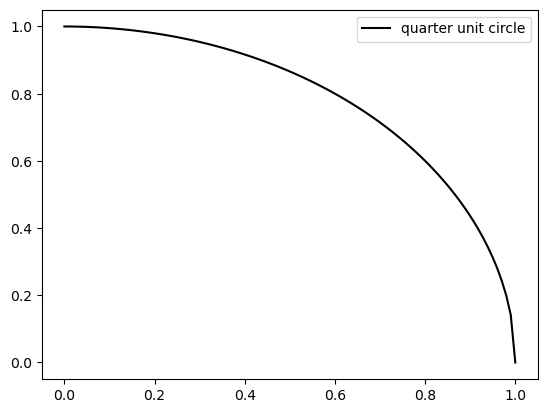

In [86]:
fig, ax = plt.subplots(1,1)
ax.plot(x_4,quarter_unit_circle(x_4), label="quarter unit circle", color="black")
ax.legend(loc='upper right')

The area under the curve of the quarter unit circle is equal to $\frac{\pi}{4}$ so by approximating the area under the curve and multiplying the result by 4 we will get an approximation of $\pi$ 

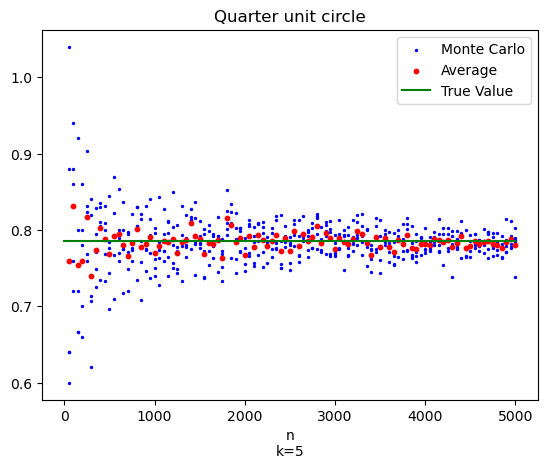

In [78]:
a, _ = integrate.quad(quarter_unit_circle,0,1)
fig,ax = make_plot(k=5,max_n=5000,min_n=50,n_int=50,func=quarter_unit_circle,x2=1,M=2,x1=0,inc_avg=True,true_val=a)
ax.set_title('Quarter unit circle')
ax.set_xlabel("n\nk={}".format(5))
ax.legend(loc='upper right')

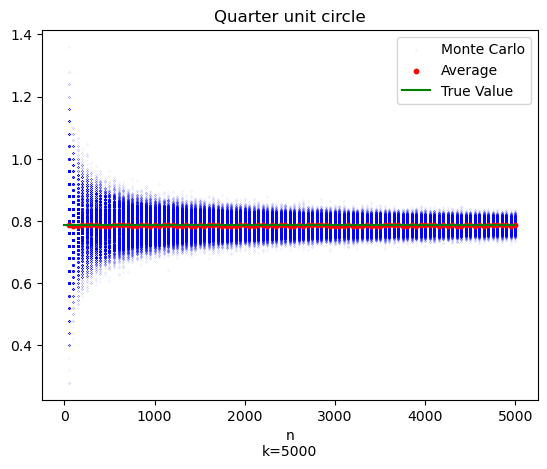

In [79]:
a, _ = integrate.quad(quarter_unit_circle,0,1)
fig,ax = make_plot(k=5000,max_n=5000,min_n=50,n_int=50,func=quarter_unit_circle,x2=1,M=2,x1=0,inc_avg=True,true_val=a)
ax.set_title('Quarter unit circle')
ax.set_xlabel("n\nk={}".format(5000))
ax.legend(loc='upper right')

#### Approximating the value of $\frac{\pi}{4}$

In [80]:
approx = np.average(k_sim(5000,5000,quarter_unit_circle,1,2))
print("approximation of pi/4:{}\n"
      "true value of pi/4:{}\n"
      "calculated approximated value of pi:{}\n"
      "true value of pi:{}".format(approx,np.pi/4,approx*4,np.pi))

approximation of pi/4:0.78531744
true value of pi/4:0.7853981633974483
calculated approximated value of pi:3.14126976
true value of pi:3.141592653589793


### Plot saving

In [81]:
functions = [root_3,sin,third_fun]
kvals = [5, 5000]
x2s = [8,np.pi,1]
max_n = 5000
min_n = 50
n_int = 50
Ms = [3,2,1]
a0, _ =  integrate.quad(root_3,0, x2s[0])
a1, _ =  integrate.quad(sin, 0, x2s[1])
a2, _ =  integrate.quad(third_fun,0, x2s[2])
true_vals = [a0,a1,a2]

In [82]:
# save_plots(functions=functions,kvals=kvals,max_n=max_n,min_n=min_n,n_int=n_int,x2s=x2s,Ms=Ms,true_vals=true_vals)

In [85]:
a1 = integrate.quad(root_3,0,8)
print(a1)
a2 = integrate.quad(sin,0,np.pi)
print(a2)
a3 = integrate.quad(third_fun,0,1)
print(a3)

(11.999999999999996, 1.3322676295501875e-14)
(2.0, 2.220446049250313e-14)
(0.2, 2.220446049250313e-15)
